In [2]:
from drug_utils import DataHandler
from collections import defaultdict
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from drug_utils import DataHandler

In [3]:
def vectorize_names(names):
    """Vectorizes the given list of names using TF-IDF."""
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(names)
    return X

def find_eps_value(X):
    """Finds an appropriate 'eps' value for DBSCAN using the nearest neighbors approach."""
    nearest_neighbors = NearestNeighbors(n_neighbors=2)
    neighbors = nearest_neighbors.fit(X)
    distances, indices = neighbors.kneighbors(X)
    sorted_distances = np.sort(distances, axis=0)[:, 1]
    return sorted_distances

def plot_nearest_neighbors(sorted_distances):
    """Plots the nearest neighbors distance for determining 'eps' value."""
    plt.figure(figsize=(10,5))
    plt.plot(sorted_distances)
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.title("Nearest Neighbors Distance")
    plt.show()

In [4]:
def consolidate_clusters(drugs_data):
    # Group Data by Cluster, excluding -1
    cluster_groups = defaultdict(list)
    for drug in drugs_data:
        if drug['Cluster'] != -1:
            cluster_groups[drug['Cluster']].append(drug)
    
    # Consolidate Grouped Data
    consolidated_data = []
    for cluster, drugs in cluster_groups.items():
        if drugs:
            # Use the first drug's data as the template
            consolidated_entry = drugs[0].copy()
            # Replace name with the most common name in the cluster
            names = [drug['name'] for drug in drugs]
            consolidated_entry['name'] = min(set(names), key=names.count)
            # Optionally, combine other attributes here
            consolidated_entry['uses'] = list(set(use for drug in drugs for use in drug.get('uses', [])))
            consolidated_entry['drug_classes'] = list(set(use for drug in drugs for use in drug.get('drug_classes', [])))
            consolidated_entry['status'] = drugs[0]['status']
            consolidated_entry['cui'] = drugs[0]['cui']
            consolidated_data.append(consolidated_entry)
    
    # Include the entries with Cluster -1 as they are
    consolidated_data.extend(drug for drug in drugs_data if drug['Cluster'] == -1)
    
    return consolidated_data


In [5]:

def perform_dbscan_clustering(X, eps_value, min_samples):
    """Performs DBSCAN clustering on the given data."""
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    return clusters

def display_cluster_results(drug_names, clusters):
    """Organizes and displays the clustering results."""
    clusters_dict = {}
    for name, cluster in zip(drug_names, clusters):
        if cluster not in clusters_dict:
            clusters_dict[cluster] = []
        clusters_dict[cluster].append(name)

    for cluster, names in clusters_dict.items():
        print(f"Cluster {cluster}: {', '.join(names)}")


In [7]:
dh = DataHandler("../processed_data.json")
drugs_data = dh.load_data()

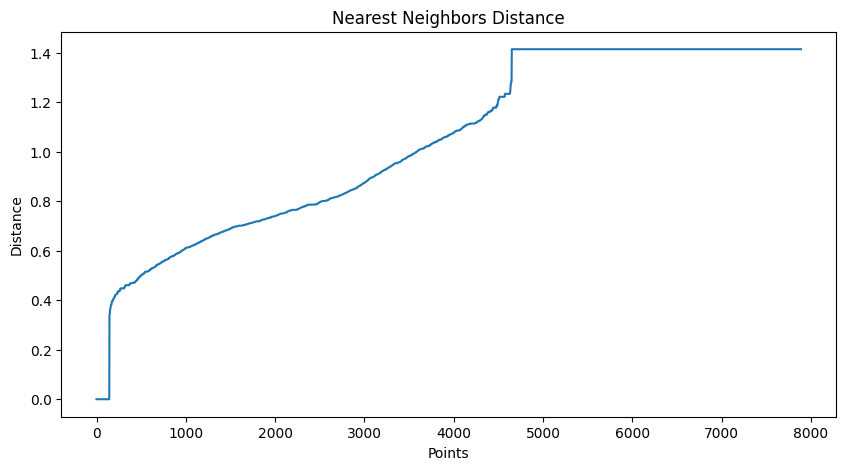

In [12]:
drug_names = [drug['name'] for drug in drugs_data]  # List of drug names
combined_features = [drug['name'] for drug in drugs_data]
X = vectorize_names(combined_features)
sorted_distances = find_eps_value(X)
plot_nearest_neighbors(sorted_distances)

In [14]:
clusters = perform_dbscan_clustering(X, .43, 2)
display_cluster_results(drug_names, clusters)

Cluster -1: Azulfidine, Abstral, Aczone, Adzynma, Adzenys XR-ODT, AfterPill, Afstyla (recombinant), Afrin Severe Congestion NoDrip, Airsupra (inhalation), Airsupra, Akynzeo for (injection), Alyq, Amzeeq, Anzemet, Anusol-HC (cream, suppository), Aptivus, Aquoral, Aquatab DM, Aquatab D, Aquasol A, Aquaphor Itch Relief Maximum Strength, Aquaphor Itch Relief, Aquaphor Healing, Aquaphilic with Urea, Aquanil HC, Aqua-Ban, Aqua Care, Aptensio XR, Aprodine, Apri, Apretude, Apresoline, Aprepitant, Apremilast, Apraclonidine ophthalmic, Appearex, Apomorphine, Aplenzin, Apidra, Aphthasol, Aphexda, Aphedrid, Apadaz, A-Phedrin, Anusol-HC, Anucort-HC (cream, suppository), Anu-Med (rectal), Anturol, Antizol, Antivert, Antivenom (Centruroides scorpion), Antivenin (Crotalidae) polyvalent, Antiseptic Skin Cleanser, Antilirium, Antihistamine and Nasal Decongestant, Antihemophilic factor (recombinant), Antihemophilic factor (human), Antihemophilic and von Willebrand factor complex, Anti-thymocyte globulin 